# Artificial Neural Network

## Importing the libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

## Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')


## Data Understanding

In [4]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
# count the unique values of a column

dataset['Geography'].value_counts(dropna=False).head()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Check missing values

<AxesSubplot:>

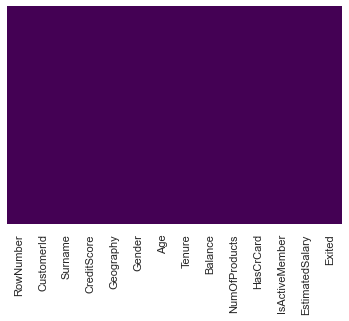

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
dataset.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
missing_percentage = dataset.isnull().sum() /dataset.shape[0] * 100
missing_percentage.sort_values(ascending=False)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Dependant and independant variable

In [19]:
X = dataset.iloc[:, 3:13] ## dependant variable
y = dataset.iloc[:, 13] ## target varible

## Data Preprocessing

## Create dummy variables

In [20]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

In [21]:
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns

In [22]:
X=X.drop(['Geography','Gender'],axis=1)

## Splitting the dataset into the Training set and Test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model creation

## Initialising the ANN

In [34]:
classifier = tf.keras.Sequential()

## Adding the input layer and the first hidden layer

In [38]:
classifier.add(tf.keras.layers.Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_shape = (11,)))

## Adding the second hidden layer

In [40]:
classifier.add(tf.keras.layers.Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

## Adding the output layer

In [41]:
classifier.add(tf.keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

## Compiling the ANN

In [42]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the ANN to the Training set

In [45]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.7417 - val_loss: 0.5445 - val_accuracy: 0.7838
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5134 - accuracy: 0.7897 - val_loss: 0.5076 - val_accuracy: 0.7933
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4856 - accuracy: 0.7972 - val_loss: 0.4881 - val_accuracy: 0.7933
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4693 - accuracy: 0.7996 - val_loss: 0.4751 - val_accuracy: 0.7948
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4572 - accuracy: 0.8016 - val_loss: 0.4650 - val_accuracy: 0.7967
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8031 - val_loss: 0.4565 - val_accuracy: 0.7993
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8054 - val_loss: 0.4497 - val_accuracy: 0.7997

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3485 - accuracy: 0.8559 - val_loss: 0.3727 - val_accuracy: 0.8357
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3480 - accuracy: 0.8563 - val_loss: 0.3723 - val_accuracy: 0.8376
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8569 - val_loss: 0.3721 - val_accuracy: 0.8376
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8597 - val_loss: 0.3718 - val_accuracy: 0.8402
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.8589 - val_loss: 0.3713 - val_accuracy: 0.8410
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3455 - accuracy: 0.8599 - val_loss: 0.3713 - val_accuracy: 0.8413
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.8606 - val_loss: 0.3710 - val_accuracy:

## list all data in history

In [46]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## summarize history for accuracy

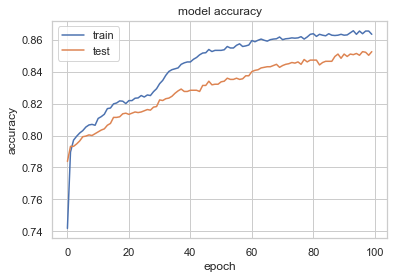

In [48]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## summarize history for loss

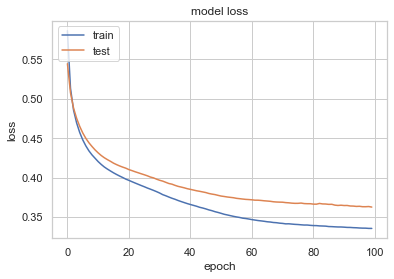

In [49]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model

## Predicting the Test set results

In [50]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

## Making the Confusion Matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)

In [52]:
cm

array([[1509,   86],
       [ 210,  195]], dtype=int64)

## Calculate the Accuracy

In [53]:
score=accuracy_score(y_pred,y_test)

In [54]:
score

0.852